In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from scipy import stats

In [4]:
#Load dataset
file = "C:\\Users\\work12\\Desktop\\AI Genie\\cats.csv"
names = ['Sno','Sex','BodyW','HeartW']
df = pd.read_csv(file)

In [7]:
df.info()
df.info('BodyW')
df.isnull
df.describe()
df['Bwt'].max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
Unnamed: 0    144 non-null int64
Sex           144 non-null object
Bwt           144 non-null float64
Hwt           144 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
Unnamed: 0    144 non-null int64
Sex           144 non-null object
Bwt           144 non-null float64
Hwt           144 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.6+ KB


3.8999999999999999

In [9]:
df.describe()

Unnamed: 0         Bwt         Hwt
count  144.000000  144.000000  144.000000
mean    72.500000    2.723611   10.630556
std     41.713307    0.485307    2.434636
min      1.000000    2.000000    6.300000
25%     36.750000    2.300000    8.950000
50%     72.500000    2.700000   10.100000
75%    108.250000    3.025000   12.125000
max    144.000000    3.900000   20.500000

In [12]:
df1 = df.iloc[:,1:4].drop_duplicates()

In [13]:
df1.describe()

Bwt         Hwt
count  133.000000  133.000000
mean     2.745865   10.729323
std      0.493827    2.472631
min      2.000000    6.300000
25%      2.300000    9.000000
50%      2.700000   10.400000
75%      3.100000   12.200000
max      3.900000   20.500000

In [17]:
# Split - out validation dataset
array = df1.values
X = array[:,1:3]
Y = array[:,0]
validation_size = 0.20
seed = 7

X_train,X_validation,Y_train,Y_validation = model_selection.train_test_split(X,Y,test_size = validation_size,random_state = seed)

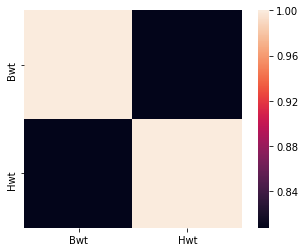

In [19]:
sns.heatmap(df1.corr(),vmax=1,square=True)

In [23]:
#Test options and evaluation metric
seed =7
scoring = 'accuracy'

#Spot check algorithm
models = []
models.append(('LR',LogisticRegression()))
#evaluate each module in turn

results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed)
    cv_results = model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)
    
#Make prediction on validation set

LR = LogisticRegression()
LR.fit(X_train,Y_train)
print("The R Square score", LR.score(X_train,Y_train))
print("The slope value", LR.coef_)
print("The intercept value",LR.intercept_)

LR: 0.651818 (0.096813)
The R Square score 0.679245283019
The slope value [[ 1.06088836  0.03912276]]
The intercept value [-2.5234552]


In [24]:
predictions = LR.predict(X_validation)
print("Accuracy score")
print(accuracy_score(Y_validation,predictions))
print("Confusion matrix")
print(confusion_matrix(Y_validation,predictions))
print('Classification report')
print(classification_report(Y_validation,predictions))

Accuracy score
0.814814814815
Confusion matrix
[[ 0  5]
 [ 0 22]]
Classification report
             precision    recall  f1-score   support

          F       0.00      0.00      0.00         5
          M       0.81      1.00      0.90        22

avg / total       0.66      0.81      0.73        27



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
